# Jupyter Notebook for IPCC 6th Assessment Report Working Group 1  
# Figure 6.11  
Creator Chaincy Kuo, Lawrence Berkeley National Laboratory  
Creation Date:  11 March 2021  

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gp
import cartopy.crs as ccrs
import numpy as np
import regionmask
from scipy import signal as sig
from netCDF4 import Dataset
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

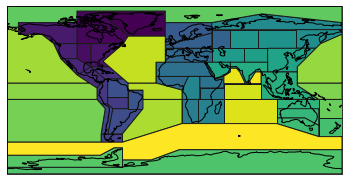

In [2]:


regiondir='/anaconda2/envs/geo_env/lib/python3.8/site-packages/regionmask/defined_regions/data/AR6_WGI_referenceRegions'
df = gp.read_file("%s/AR6_WGI_referenceRegions.shp" % regiondir)
df["i"] = df.index # assing the index as column, so we can use it to color the regions

f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))
df.plot(column="i", ax=ax, transform=ccrs.PlateCarree(), edgecolor="0.1")
ax.coastlines()

In [3]:
df

,V1,V2,V3,geometry,i
0,ARCTIC,Greenland/Iceland,GIC,"POLYGON ((-10.00000 58.00000, -10.43956 58.000...",0
1,NORTH-AMERICA,N.E.Canada,NEC,"POLYGON ((-55.00000 50.00000, -55.43860 50.000...",1
2,NORTH-AMERICA,C.North-America,CNA,"POLYGON ((-90.00000 50.00000, -90.00000 49.561...",2
3,NORTH-AMERICA,E.North-America,ENA,"POLYGON ((-70.00000 25.00000, -70.43478 25.000...",3
4,NORTH-AMERICA,N.W.North-America,NWN,"POLYGON ((-105.00000 50.00000, -105.43860 50.0...",4
5,NORTH-AMERICA,W.North-America,WNA,"POLYGON ((-130.00000 50.00000, -129.56140 50.0...",5
6,CENTRAL-AMERICA,N.Central-America,NCA,"POLYGON ((-90.00000 25.00000, -90.37179 24.769...",6
7,CENTRAL-AMERICA,S.Central-America,SCA,"POLYGON ((-75.00000 12.00000, -75.28000 11.673...",7
8,CENTRAL-AMERICA,Caribbean,CAR,"POLYGON ((-75.00000 12.00000, -75.32609 12.282...",8
9,SOUTH-AMERICA,N.W.South-America,NWS,"POLYGON ((-75.00000 12.00000, -74.57143 12.000...",9


In [4]:
# define a longitude latitude grid
lon = np.arange(-179.5, 180)
lat = np.arange(-89.5, 90)

# for the plotting
lon_edges = np.arange(-180, 181)
lat_edges = np.arange(-90, 91)

In [5]:
# read the erf netcdf file
erfdir='/Users/chaincy/research/ipcc/figures/data'
flwerf=Dataset('%s/rsut_diff_timemap.nc' % erfdir,mode='r')

erfdir='/Users/chaincy/research/ipcc/figures/data/recipe_ck_erf_histSST-piNTCF_time_20200928_074120/plots/diffexpts/ar6fig6_erf'
erfdir='/Users/chaincy/research/ipcc/figures/data/recipe_ck_erf_histSST-piNTCF_time_20210305_082116/plots/diffexpts/ar6fig6_erf_time'
erfdir='/Users/chaincy/research/ipcc/figures/data/recipe_ck_erf_histSST-piAer_time_20210309_004424/plots/diffexpts/ar6fig6_erf_time'
flwerf=Dataset('%s/LW_diff_timemap.nc' % erfdir,mode='r')

nlat=flwerf.dimensions['lat'].size
nlon=flwerf.dimensions['lon'].size
ntime=flwerf.dimensions['time'].size

lat=np.zeros((nlat,))
lon=np.zeros((nlon,))
lwerftime=np.zeros((ntime,nlat,nlon))
lat=flwerf.variables['lat'][:]
lon=flwerf.variables['lon'][:]


lwerftime[:,:,:] = flwerf.variables['ERF'][:]

flwerf.close()

In [6]:
# read the erf netcdf file
erfdir='/Users/chaincy/research/ipcc/figures/data'
fswerf=Dataset('%s/rsut_diff_timemap.nc' % erfdir,mode='r')

erfdir='/Users/chaincy/research/ipcc/figures/data/recipe_ck_erf_histSST-piNTCF_time_20200928_074120/plots/diffexpts/ar6fig6_erf'
erfdir='/Users/chaincy/research/ipcc/figures/data/recipe_ck_erf_histSST-piNTCF_time_20210305_082116/plots/diffexpts/ar6fig6_erf_time'
erfdir='/Users/chaincy/research/ipcc/figures/data/recipe_ck_erf_histSST-piAer_time_20210309_004424/plots/diffexpts/ar6fig6_erf_time'
fswerf=Dataset('%s/SW_diff_timemap.nc' % erfdir,mode='r')

nlat=fswerf.dimensions['lat'].size
nlon=fswerf.dimensions['lon'].size
ntime=fswerf.dimensions['time'].size

lat=np.zeros((nlat,))
lon=np.zeros((nlon,))
swerftime=np.zeros((ntime,nlat,nlon))
lat=fswerf.variables['lat'][:]
lon=fswerf.variables['lon'][:]


swerftime[:,:,:] = fswerf.variables['ERF'][:]

fswerf.close()

In [7]:
np.shape(lwerftime)

(165, 180, 360)

In [8]:
# modern period ERF small regions
# modern period is 1995-2014
# CMIP ends at 2014
mpyrs=20

lwerf=np.zeros((1,nlat,nlon))
lwerf[0,:,:] = lwerftime[ntime-mpyrs:ntime,:,:].mean(axis=0)
swerf=np.zeros((1,nlat,nlon))
swerf[0,:,:] = swerftime[ntime-mpyrs:ntime,:,:].mean(axis=0)

cmax = np.max([np.abs(lwerf),np.abs(swerf)])
cmin = -cmax
clev=10
cincr = (cmax-cmin)/float(clev)
crange = np.arange(cmin,cmax+cincr,cincr)

In [9]:
ar6wg1regions = regionmask.Regions(df.geometry, names=df.V2, abbrevs=df.V3, name='ar6wg1')

In [10]:
ar6wg1mask = ar6wg1regions.mask(lon, lat, xarray=False)

In [11]:
# determine the quandrangle area weight 

areaweight = np.zeros((nlat,nlon),dtype=float);
lat4wt = np.zeros((nlat,2),dtype=float);
lon4wt = np.zeros((nlon,2),dtype=float);
# assumption that cells are equally spaced., but this is not correct for latitudes
dellon = 360.0/nlon;
for ilat in range(0,nlat):
    if(ilat==0):
        dellat1 = (90.0-np.abs(lat[ilat]))/2;
    else:
        dellat1 = np.abs(lat[ilat]-lat[ilat-1])/2;
    if(ilat==nlat-1):
        dellat2 = (90.0-np.abs(lat[ilat]))/2;
    else:
        dellat2 = np.abs(lat[ilat+1]-lat[ilat])/2;

    lat4wt[ilat,0] = (lat[ilat]-dellat1)/180.0 * np.pi;
    lat4wt[ilat,1] = (lat[ilat]+dellat2)/180.0 * np.pi;
for ilon in range(0,nlon):
    lon4wt[ilon,0] = (lon[ilon]-dellon/2)/180.0 * np.pi;
    lon4wt[ilon,1] = (lon[ilon]+dellon/2)/180.0 * np.pi;
for ilat in range(0,nlat):
    for ilon in range(0,nlon):
        areaweight[ilat,ilon] = np.abs(lon4wt[ilon,1]-lon4wt[ilon,0]) * np.abs(np.sin(lat4wt[ilat,1])-np.sin(lat4wt[ilat,0])) / (4.0*np.pi);       
        
np.sum(areaweight)

0.9999904807207345

In [12]:
ntime

165

In [13]:
nrgns=len(ar6wg1regions.numbers)

fout = open('fig6_LWrf_regionbar_%.4i-%.4i.txt' % (2014-mpyrs+1,2014),mode='w')
fout.write(r'%30s  <ERF> [W/m^2]    sigma_{ERF} [W/m^2]  regional area [km^2]' % 'region name')
    
eartharea = 4*np.pi*np.power(6378,2)    
totalarea = 0

plt.figure(figsize=(15,10))

proj=ccrs.PlateCarree(central_longitude=0)
    
#erf_rgns=np.zeros((nrgns,nlat,nlon))
lwerf_mns=np.zeros((nrgns,))
lwerf_std=np.zeros((nrgns,))
swerf_mns=np.zeros((nrgns,))
swerf_std=np.zeros((nrgns,))
onesgrid=np.ones((nlat,nlon),dtype=int)

for irgn in range(0,nrgns):
    maskplotlw = np.ma.masked_where(ar6wg1mask != irgn, lwerf[0,:,:])
    maskplotsw = np.ma.masked_where(ar6wg1mask != irgn, swerf[0,:,:])
    wtmask = np.ma.masked_where(ar6wg1mask != irgn, areaweight)
    maskones = np.ma.masked_where(ar6wg1mask != irgn, onesgrid)
    # plot the outline of the region
    #ax = ar6wg1regions.plot(regions=irgn, add_ocean=False,
    #                      proj=proj, add_label=False)

    #im=ax.pcolormesh(lon, lat, maskplot,vmin=cmin,vmax=cmax,cmap='twilight_shifted',transform=ccrs.PlateCarree())
    
    ngrids = np.sum(maskones)
    
    lwerf_mns[irgn] = np.sum(maskplotlw*wtmask)/np.sum(wtmask)
    lwerf_std[irgn] = np.sqrt(float((ngrids-1)/ngrids)*np.sum(np.power(maskplotlw-lwerf_mns[irgn],2)*wtmask)/np.sum(wtmask))
    swerf_mns[irgn] = np.sum(maskplotsw*wtmask)/np.sum(wtmask)
    swerf_std[irgn] = np.sqrt(float((ngrids-1)/ngrids)*np.sum(np.power(maskplotsw-swerf_mns[irgn],2)*wtmask)/np.sum(wtmask))
    #erf_std[irgn] = np.sqrt(np.sum(np.power(maskplot*wtmask-erf_mns[irgn],2)))/np.sum(wtmask)
    #fout.write('%30s %15.3e  %15.3e   %15.3e \n' % (ar6wg1regions.names[irgn],erf_mns[irgn],erf_std[irgn],eartharea*np.sum(wtmask)))    
    totalarea = totalarea + np.sum(wtmask)

fout.close()    
    
#cb=plt.colorbar(im,orientation='horizontal')
#cb.set_label(r'Longwave Effective Radiative Forcing by Short Lived Climate Forcers [W m$^{-2}$]',fontsize=16)
#plt.suptitle('Effective Radiative Forcing %.4i-%.4i'%(2014-mpyrs+1,2014),fontsize=24)
#plt.title('histSST-control - histSST-piNTCF',fontsize=20) 

#plt.savefig('fig6_7a_erf_regionmap.png',dpi=300)

<Figure size 1080x720 with 0 Axes>

In [14]:
meanLWERF=np.sum(lwerf[0,:,:]*areaweight[:,:])/np.sum(areaweight) 
ngrid=len(lwerf[0,:,:].flatten())
stdLWERF=np.sqrt(float((ngrid)/(ngrid-1))*np.sum(np.power(lwerf[0,:,:]-meanLWERF,2)*areaweight)/np.sum(areaweight))
print('global mean NTCF LWRF= %5.3f +/- %5.3f W/m^2 ' % (meanLWERF,stdLWERF))

meanSWERF=np.sum(swerf[0,:,:]*areaweight[:,:])/np.sum(areaweight) 
ngrid=len(swerf[0,:,:].flatten())
stdSWERF=np.sqrt(float((ngrid)/(ngrid-1))*np.sum(np.power(swerf[0,:,:]-meanSWERF,2)*areaweight)/np.sum(areaweight))
print('global mean NTCF SWRF= %5.3f +/- %5.3f W/m^2 ' % (meanSWERF,stdSWERF))

global mean NTCF LWRF= 0.370 +/- 0.656 W/m^2 
global mean NTCF SWRF= -1.570 +/- 1.680 W/m^2 


In [15]:
#nyears = int(ntime/12)
#lwerfann=np.zeros((nyears,nlat,nlon))
#for itime in range(0,nyears):
#    lwerfann[itime,:,:] = lwerftime[itime*12:(itime+1)*12,:,:].mean(axis=0)

nyears = ntime
lwerfann=np.zeros((nyears,nlat,nlon))
lwerfann=lwerftime

In [16]:
#nyears = int(ntime/12)
#lwerfann=np.zeros((nyears,nlat,nlon))
#for itime in range(0,nyears):
#    lwerfann[itime,:,:] = lwerftime[itime*12:(itime+1)*12,:,:].mean(axis=0)

nyears = ntime
swerfann=np.zeros((nyears,nlat,nlon))
swerfann=swerftime

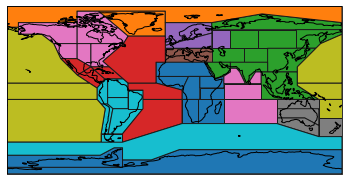

In [17]:
regiondir='/anaconda2/envs/geo_env/lib/python3.8/site-packages/regionmask/defined_regions/data/AR6_WGI_referenceRegions'
dfLG = gp.read_file("%s/AR6_WGI_referenceRegions.shp" % regiondir)
dfLG["j"] = dfLG.V1 # assing the index as column, so we can use it to color the regions

f, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()))
dfLG.plot(column="j", ax=ax, transform=ccrs.PlateCarree(), edgecolor="0.1")
ax.coastlines()

In [18]:
dfLG

,V1,V2,V3,geometry,j
0,ARCTIC,Greenland/Iceland,GIC,"POLYGON ((-10.00000 58.00000, -10.43956 58.000...",ARCTIC
1,NORTH-AMERICA,N.E.Canada,NEC,"POLYGON ((-55.00000 50.00000, -55.43860 50.000...",NORTH-AMERICA
2,NORTH-AMERICA,C.North-America,CNA,"POLYGON ((-90.00000 50.00000, -90.00000 49.561...",NORTH-AMERICA
3,NORTH-AMERICA,E.North-America,ENA,"POLYGON ((-70.00000 25.00000, -70.43478 25.000...",NORTH-AMERICA
4,NORTH-AMERICA,N.W.North-America,NWN,"POLYGON ((-105.00000 50.00000, -105.43860 50.0...",NORTH-AMERICA
5,NORTH-AMERICA,W.North-America,WNA,"POLYGON ((-130.00000 50.00000, -129.56140 50.0...",NORTH-AMERICA
6,CENTRAL-AMERICA,N.Central-America,NCA,"POLYGON ((-90.00000 25.00000, -90.37179 24.769...",CENTRAL-AMERICA
7,CENTRAL-AMERICA,S.Central-America,SCA,"POLYGON ((-75.00000 12.00000, -75.28000 11.673...",CENTRAL-AMERICA
8,CENTRAL-AMERICA,Caribbean,CAR,"POLYGON ((-75.00000 12.00000, -75.32609 12.282...",CENTRAL-AMERICA
9,SOUTH-AMERICA,N.W.South-America,NWS,"POLYGON ((-75.00000 12.00000, -74.57143 12.000...",SOUTH-AMERICA


In [19]:
ar6wg1LGregions = regionmask.Regions(dfLG.geometry, names=dfLG.V1, name='ar6wg1LG')

In [20]:
ar6wg1LGmask = ar6wg1LGregions.mask(lon, lat, xarray=False)

In [21]:
ar6wg1LGregions

58 'ar6wg1LG' Regions
r0 r1 r2 r3 r4 r5 r6 r7 r8 r9 r10 r11 r12 r13 r14 r15 r16 r17 r18 r19 r20 r21 r22 r23 r24 r25 r26 r27 r28 r29 r30 r31 r32 r33 r34 r35 r36 r37 r38 r39 r40 r41 r42 r43 r44 r45 r46 r47 r48 r49 r50 r51 r52 r53 r54 r55 r56 r57

In [22]:
nlgrgns=len(ar6wg1LGregions.numbers)

LGregions=[ar6wg1LGregions.names[0]]
LGregionIndex=np.zeros((nlgrgns,),dtype=int)
for irgn in range(1,nrgns):
    foundLGregion=0
    for ilgrgn in range(0,len(LGregions)):
        if(ar6wg1LGregions.names[irgn]==LGregions[ilgrgn]):
            LGregionIndex[irgn]=ilgrgn
            foundLGregion=1
    if(foundLGregion==0):
        LGregions.append(ar6wg1LGregions.names[irgn])
        LGregionIndex[irgn]=len(LGregions)-1

In [23]:
nlgrgns=len(LGregions)


eartharea = 4*np.pi*np.power(6378,2)    
totalarea = 0
    
slope_mod=np.zeros((nlgrgns,)) 
slope_hist=np.zeros((nlgrgns,)) 
swerf_annmns=np.zeros((nlgrgns,nyears))
swerf_annstd=np.zeros((nlgrgns,nyears))
lwerf_annmns=np.zeros((nlgrgns,nyears))
lwerf_annstd=np.zeros((nlgrgns,nyears))
LGrgnwtmask = np.zeros((nlgrgns,))
nSMrgnsinLG=np.zeros((nlgrgns,),dtype=int)
for irgn in range(0,nrgns):
    wtmask = np.ma.masked_where(ar6wg1LGmask != irgn, areaweight)
    LGrgnwtmask[LGregionIndex[irgn]] = LGrgnwtmask[LGregionIndex[irgn]] + np.sum(wtmask)
    # count how many small regions appear in the large region
    nSMrgnsinLG[LGregionIndex[irgn]] = nSMrgnsinLG[LGregionIndex[irgn]] + 1
    for iyear in range(0,nyears):
        maskplotlw = np.ma.masked_where(ar6wg1LGmask != irgn, lwerfann[iyear,:,:])
        maskplotsw = np.ma.masked_where(ar6wg1LGmask != irgn, swerfann[iyear,:,:])
        maskones = np.ma.masked_where(ar6wg1LGmask != irgn, onesgrid)
        
        ngrids = np.sum(maskones)
        
        lwerf_annmns_now = np.sum(maskplotlw*wtmask)
        swerf_annmns_now = np.sum(maskplotsw*wtmask)
        lwerf_annstd_now = np.sqrt(float((ngrids-1)/ngrids)*np.sum(np.power(maskplotlw-lwerf_mns[irgn],2)*wtmask))
        swerf_annstd_now = np.sqrt(float((ngrids-1)/ngrids)*np.sum(np.power(maskplotsw-swerf_mns[irgn],2)*wtmask))
        
        lwerf_annmns[LGregionIndex[irgn],iyear]=lwerf_annmns[LGregionIndex[irgn],iyear]+lwerf_annmns_now
        lwerf_annstd[LGregionIndex[irgn],iyear]=lwerf_annstd[LGregionIndex[irgn],iyear]+np.power(lwerf_annstd_now,2)
        swerf_annmns[LGregionIndex[irgn],iyear]=swerf_annmns[LGregionIndex[irgn],iyear]+swerf_annmns_now
        swerf_annstd[LGregionIndex[irgn],iyear]=swerf_annstd[LGregionIndex[irgn],iyear]+np.power(swerf_annstd_now,2)
        
for ilgrgn in range(0,nlgrgns):
    lwerf_annmns[ilgrgn,:]=lwerf_annmns[ilgrgn,:]/LGrgnwtmask[ilgrgn]
    lwerf_annstd[ilgrgn,:]=np.sqrt(lwerf_annstd[ilgrgn,:]/float(nSMrgnsinLG[ilgrgn]))
    swerf_annmns[ilgrgn,:]=swerf_annmns[ilgrgn,:]/LGrgnwtmask[ilgrgn]
    swerf_annstd[ilgrgn,:]=np.sqrt(swerf_annstd[ilgrgn,:]/float(nSMrgnsinLG[ilgrgn]))

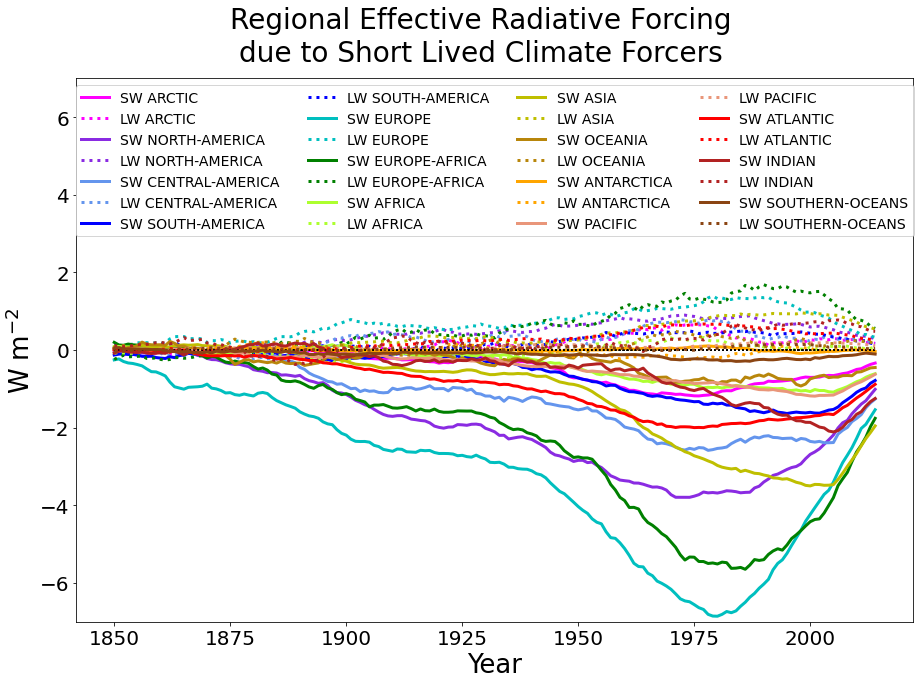

In [24]:
# 14 large Atlas regions
nrows=1
ncols=1

# boxcar for running average window
boxsize = 20 # years
boxcarwin = np.ones((int(boxsize),))/float(boxsize)

# assign colors to large Atlas regions
nclr=['magenta','blueviolet','cornflowerblue','b','c','g','greenyellow','y','darkgoldenrod','orange','darksalmon','r','firebrick','saddlebrown']

plt.figure(figsize=(ncols*15,nrows*10))
#plt.subplots_adjust(top=0.9,hspace=0.65,wspace=0.3)
plt.suptitle('Regional Effective Radiative Forcing''\n''due to Short Lived Climate Forcers', fontsize=28)

ymax=np.max([np.abs(lwerf_annmns),np.abs(swerf_annmns)])
ymax=7
ymin=-ymax

styr=2014-nyears+1
for ilgrgn in range(0,nlgrgns):
    #plt.subplot(nrows,ncols,ilgrgn+1)
    #if(ilgrgn==8 or ilgrgn==9):
    #    plt.title('%s' % (LGregions[ilgrgn]),fontsize=16,color=nclr[ilgrgn],backgroundcolor='grey')
    #else:
    
    boxlwerf = sig.convolve(lwerf_annmns[ilgrgn,:],boxcarwin,'same');
    boxswerf = sig.convolve(swerf_annmns[ilgrgn,:],boxcarwin,'same');
    yrbox = sig.convolve(np.arange(styr,styr+nyears),boxcarwin,'same');
    
    #plt.title('%s' % (LGregions[ilgrgn]),fontsize=16)#,color=nclr[ilgrgn])
    #plt.plot(np.arange(styr,styr+nyears),erf_annmns[ilgrgn,:],color=nclr[ilgrgn],alpha=0.25)
    plt.plot(np.arange(styr,styr+nyears),np.zeros((nyears,)),'k:')
    
    # running average
    plt.plot(np.arange(styr,styr+nyears),boxswerf,color=nclr[ilgrgn],linewidth=3,label='SW %s' % LGregions[ilgrgn])
    plt.plot(np.arange(styr,styr+nyears),boxlwerf,color=nclr[ilgrgn],linewidth=3,linestyle=':',label='LW %s' %LGregions[ilgrgn])
   
    plt.legend(loc=9,ncol=4,fontsize=14)
    
    plt.ylim(ymin,ymax)
    plt.xlabel(r'Year',fontsize=26)
    plt.ylabel(r'W m$^{-2}$',fontsize=26)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    #plt.text(1850,ymax*0.75,r'tr$_{ERF}$=%5.1e'% slope_hist[ilgrgn])
    #plt.text(1995,ymax*0.75,r'tr$_{ERF}$=%5.1e'% slope_mod[ilgrgn])
    
plt.savefig('LargeRegionTemporalERF_LWSW_%.4i-%.4i_one.png'%(2014-ntime+1,2014),dpi=300)

<Figure size 1080x720 with 0 Axes>

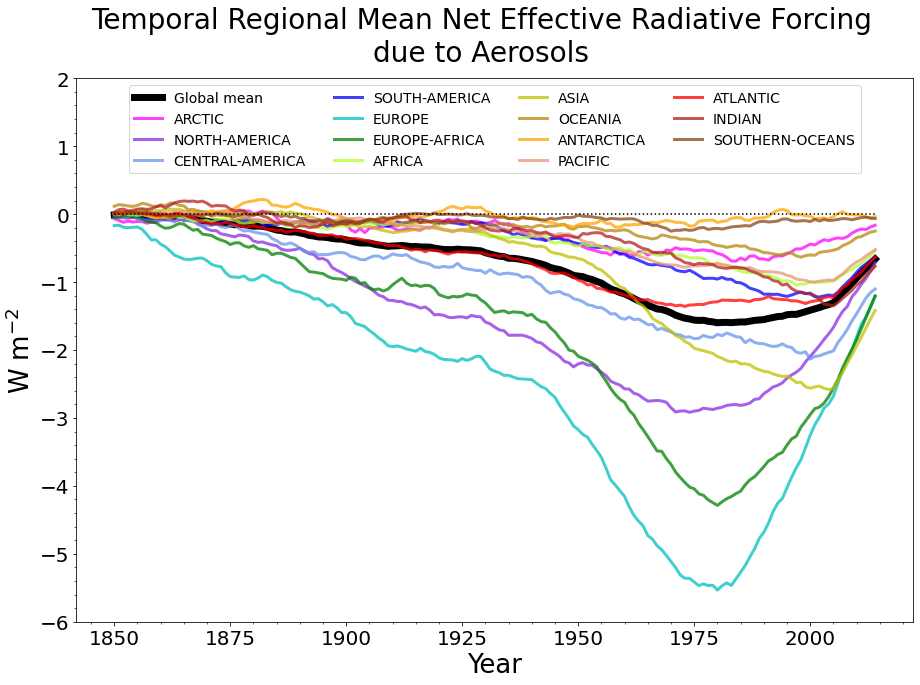

In [25]:
# 14 large Atlas regions
nrows=1
ncols=1

# boxcar for running average window
boxsize = 20 # years
boxcarwin = np.ones((int(boxsize),))/float(boxsize)

# assign colors to large Atlas regions
nclr=['magenta','blueviolet','cornflowerblue','b','c','g','greenyellow','y','darkgoldenrod','orange','darksalmon','r','firebrick','saddlebrown']

plt.figure(figsize=(ncols*15,nrows*10))
fig, ax = plt.subplots(figsize=(ncols*15,nrows*10))
#plt.subplots_adjust(top=0.9,hspace=0.65,wspace=0.3)
plt.suptitle('Temporal Regional Mean Net Effective Radiative Forcing''\n''due to Aerosols', fontsize=28)


ymax=np.max([np.abs(lwerf_annmns),np.abs(swerf_annmns)])
ymax=6
ymin=-ymax

styr=2014-nyears+1

boxneterf = sig.convolve((lwerf_annmns[:,:]+swerf_annmns[:,:]).mean(axis=0),boxcarwin,'same')
yrbox = sig.convolve(np.arange(styr,styr+nyears),boxcarwin,'same');
plt.plot(np.arange(styr,styr+nyears),boxneterf,color='k',linewidth=7,label='Global mean' )
for ilgrgn in range(0,nlgrgns):
    #plt.subplot(nrows,ncols,ilgrgn+1)
    #if(ilgrgn==8 or ilgrgn==9):
    #    plt.title('%s' % (LGregions[ilgrgn]),fontsize=16,color=nclr[ilgrgn],backgroundcolor='grey')
    #else:
    
    boxlwerf = sig.convolve(lwerf_annmns[ilgrgn,:],boxcarwin,'same');
    boxswerf = sig.convolve(swerf_annmns[ilgrgn,:],boxcarwin,'same');
    yrbox = sig.convolve(np.arange(styr,styr+nyears),boxcarwin,'same');
    
    #plt.title('%s' % (LGregions[ilgrgn]),fontsize=16)#,color=nclr[ilgrgn])
    #plt.plot(np.arange(styr,styr+nyears),erf_annmns[ilgrgn,:],color=nclr[ilgrgn],alpha=0.25)

    
    # running average
    plt.plot(np.arange(styr,styr+nyears),boxswerf+boxlwerf,color=nclr[ilgrgn],linewidth=3,label='%s' % LGregions[ilgrgn],alpha=0.75)
    #plt.plot(np.arange(styr,styr+nyears),boxlwerf,color=nclr[ilgrgn],linewidth=3,linestyle=':',label='LW %s' %LGregions[ilgrgn])

plt.plot(np.arange(styr,styr+nyears),np.zeros((nyears,)),'k:')

    
plt.legend(loc=9,ncol=4,fontsize=14)
    
plt.ylim(ymin,2)
plt.xlabel(r'Year',fontsize=26)
plt.ylabel(r'W m$^{-2}$',fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
    
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
#ax.tick_params(axis='both',which='minor',direction='in')

#plt.text(1850,ymax*0.75,r'tr$_{ERF}$=%5.1e'% slope_hist[ilgrgn])
#plt.text(1995,ymax*0.75,r'tr$_{ERF}$=%5.1e'% slope_mod[ilgrgn])


plt.savefig('LargeRegionTemporalERF_NET_%.4i-%.4i_one.png'%(2014-ntime+1,2014),dpi=300)
plt.savefig('LargeRegionTemporalERF_NET_%.4i-%.4i_one.svg'%(2014-ntime+1,2014),dpi=300)

In [26]:
lwerf_annmns.max()

3.5065262099602776

In [27]:
swerf_annmns.max()

1.8349915183394991

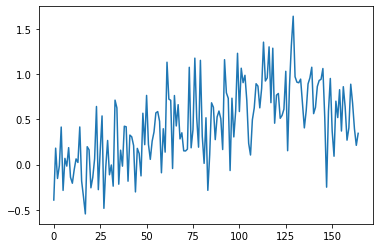

In [28]:

ilgrgn=1
plt.plot(lwerf_annmns[ilgrgn,:])

In [29]:
print(r'global mean ERF %3.2f +/- %3.2f W/m$^2$' %  (meanLWERF+meanSWERF,np.sqrt(np.power(stdLWERF,2)+np.power(stdSWERF,2))))

global mean ERF -1.20 +/- 1.80 W/m$^2$
